# <font face="times"><font size="6pt"><p style = 'text-align: center;'> The City University of New York, Queens College

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Introduction to Computational Social Science</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>Lesson 06 | KNN and SVM</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>5 Checkpoints</b><br/><br/>



***
***
# Begin Lesson 06

## Supervised Learning In-Depth: 

### KNN and SVMs

# What is machine learning, and how does it work?
*Source, from the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

![Machine learning](Images/01_robot.png)

## Overview

- What is machine learning?
- What are the two main categories of machine learning?
- What are some examples of machine learning?
- How does machine learning "work"?

## What is machine learning?

There are a few ways to think about this. For instance, machine learning is in some sense using computers to detect patterns in data. But let's be a more analytical. Here's a definition that we can work through: "Machine learning is the semi-automated extraction of knowledge from data." What does each part of this definition mean?

- **Knowledge from data**: Machine learning starts with a question that might be answerable using data
- **Automated extraction**: A computer provides the insight
- **Semi-automated**: A computer provides the insight, but it also requires many smart decisions by a human

You might also wonder how this is different from statistics more generally. There are lots of opinions about this, but we can start and end with a [famous paper](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726) by Leo Breiman, an equally famous statistician. Breiman suggests that the difference between machine learning and statistics boils down to culture: statistics has historically been more interested in models that can be understood and explained by human beings, while machine learning has more pragmatic goals with its algorithms, aiming not to necessarily be understood, but to produce workable solutions to particular problems.

As a result, while you might be able to explain to a friend or a client what an OLS model is doing and what its results mean, you may not be able to do the same thing with certain machine learning approaches. It may be hard to explain how a particular neural network (to take an extreme example) arrived at its results, but it will still make accurate predictions, often noticeably better than those made by an OLS model.

## What are the two main categories of machine learning?

**Supervised learning**: Making predictions using data
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict

![Spam filter](Images/01_spam_filter.png)

**Unsupervised learning**: Extracting structure from data

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"

![Clustering](Images/01_clustering.png)

## How does (supervised) machine learning "work"?

High-level steps of supervised learning:

1. First, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome (i.e. there is a column in the dataframe registering the outcome)
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

2. Then, make **predictions** on **new data** for which the label is unknown

![Supervised learning](Images/01_supervised_learning.png)

The primary goal of supervised learning is to build a model that "generalizes": It accurately predicts the **future** rather than the **past**!

## How does (unsupervised) machine learning "work"?

Glad you asked! Models will specify how it is that they find structure in a mass of data. The actual process they use, however, varies--sometimes pretty dramatically--from model to model.

## Questions about machine learning

- How do I choose **which attributes** of my data to include in the model?
- How do I choose **which model** to use?
- How do I **optimize** this model for best performance?
- How do I ensure that I'm building a model that will **generalize** to unseen data?
- Can I **estimate** how well my model is likely to perform on unseen data?

## Resources

- Book: [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (section 2.1, 14 pages)
- Video: [Learning Paradigms](http://work.caltech.edu/library/014.html) (13 minutes)

***
***

## Using `Scikit-Learn`

- What are the benefits and drawbacks of scikit-learn?

![scikit-learn algorithm map](Images/02_sklearn_algorithms.png)

## Benefits of `scikit-learn`:

- **Consistent interface** to machine learning models
- Provides many **tuning parameters** but with **sensible defaults**
- Exceptional **documentation**
- Rich set of functionality for **companion tasks**
- **Active community** for development and support


By the end of this notebook you should:

- have a qualitative idea of what problem K-Nearest Neighbors (KNN) and Support Vector Machines (SVMs) are trying to solve
- understand how decision trees work
- understand how multiple decision trees are combined into *Random Forests*

***
***

## Exploring Multi-Dimensional Data with Machine Learning

First, let's explore one of the most popular machine learning algorithms called K-Nearest Neighbor (KNN). To do so, we'll need to first prep data and explore how we use these data with machine learning algorithims. 

So, let's import our required modules that we'll be using. 

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Let's load our test data using `pandas`. 

In [2]:
fruits = pd.read_csv('Data/fruit_data_with_colors.txt',sep="\t")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Now, let's create a mapping from fruit label value to fruit name to make results easier to interpret

In [3]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

***
Now, let's examine the data. 

First, though, we'll import one last module. We haven't seen the `cm` module from matplotlib yet, but it will help us plot a scatter matrix, which will be useful in a moment.

In [4]:
from matplotlib import cm

Now split our data into our dependent variables (e.g., Y) and our independent variables (e.g., X)

In [5]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

Now, let's use the train_test_split `scikit-learn` function to split both the X and y DataFrames into a "training" and a "test" set. This function will split-off 25% of the data for "testing" and the other 75% for "training." This is the default setup.

The idea here is important. If we train a model with the full set of data we risk "overfitting" it, or teaching it to so perfectly map a particular set of data (including its outliers and anomalies) that it loses sight of more general patterns. In the worst case scenario, overfitting can even make a model *in*effective when applied to data outside of the training set.

Because the train_test_split function creates two times the number of dataframes as what you started with, if you want to keep these subsets you need to specify enough objects to store them. So, if we want to split X and y into training and test sets we need four objects to hold those results:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

***
***

# Checkpoint 1 of 5

## Now you try!

### Repeat the steps above and create a new set of training and testing data, but calling them:

`X_train_chkpt1, X_test_chkpt1, y_train_chkpt1, y_test_chkpt1`


In [11]:
fruits = pd.read_csv('Data/fruit_data_with_colors.txt',sep="\t")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [12]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [13]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']

In [14]:
X_train_chkpt1, X_test_chkpt1, y_train_chkpt1, y_test_chkpt1= train_test_split(X, y, random_state=0)

***
***

### Plotting and exploring these data

Let's take a look at the training data before we do anything.

We're going to make a 3D scatter plot, where the three dimensions will be the "height," "width," and the "mass" of the fruit. 

Let's use the `cm` module to first set it up. 

In [15]:
cmap = cm.get_cmap('gnuplot')

Now, let's use pandas (e.g., `pd`) to create a 2D scatter plot, where we plot every independent variable with each other. We will use the `plotting` function, specifically the `scatter_matrix` function. What's great about this function is that we get scatterplots of all independent variables, and we get histograms on its diagonals.  

We're going to use the `X_train` `DataFrame`, where the color of the markers (in this case, circles) is the value assigned by the `y_train` `DataFrame`.

Let's also pass in `cmap` to the `scatter_matrix` as well.

In [16]:
scatter = pd.scatter_matrix(X_train, #Our independent variables
                                     c= y_train, #Color is the group
                                     marker = 'o', #Dots
                                     s=40, #Size
                                     hist_kwds={'bins':15}, #The bin size for the diagonal histograms
                                     figsize=(9,9), #Size of the scatterplot
                                     cmap=cmap)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

<IPython.core.display.Javascript object>


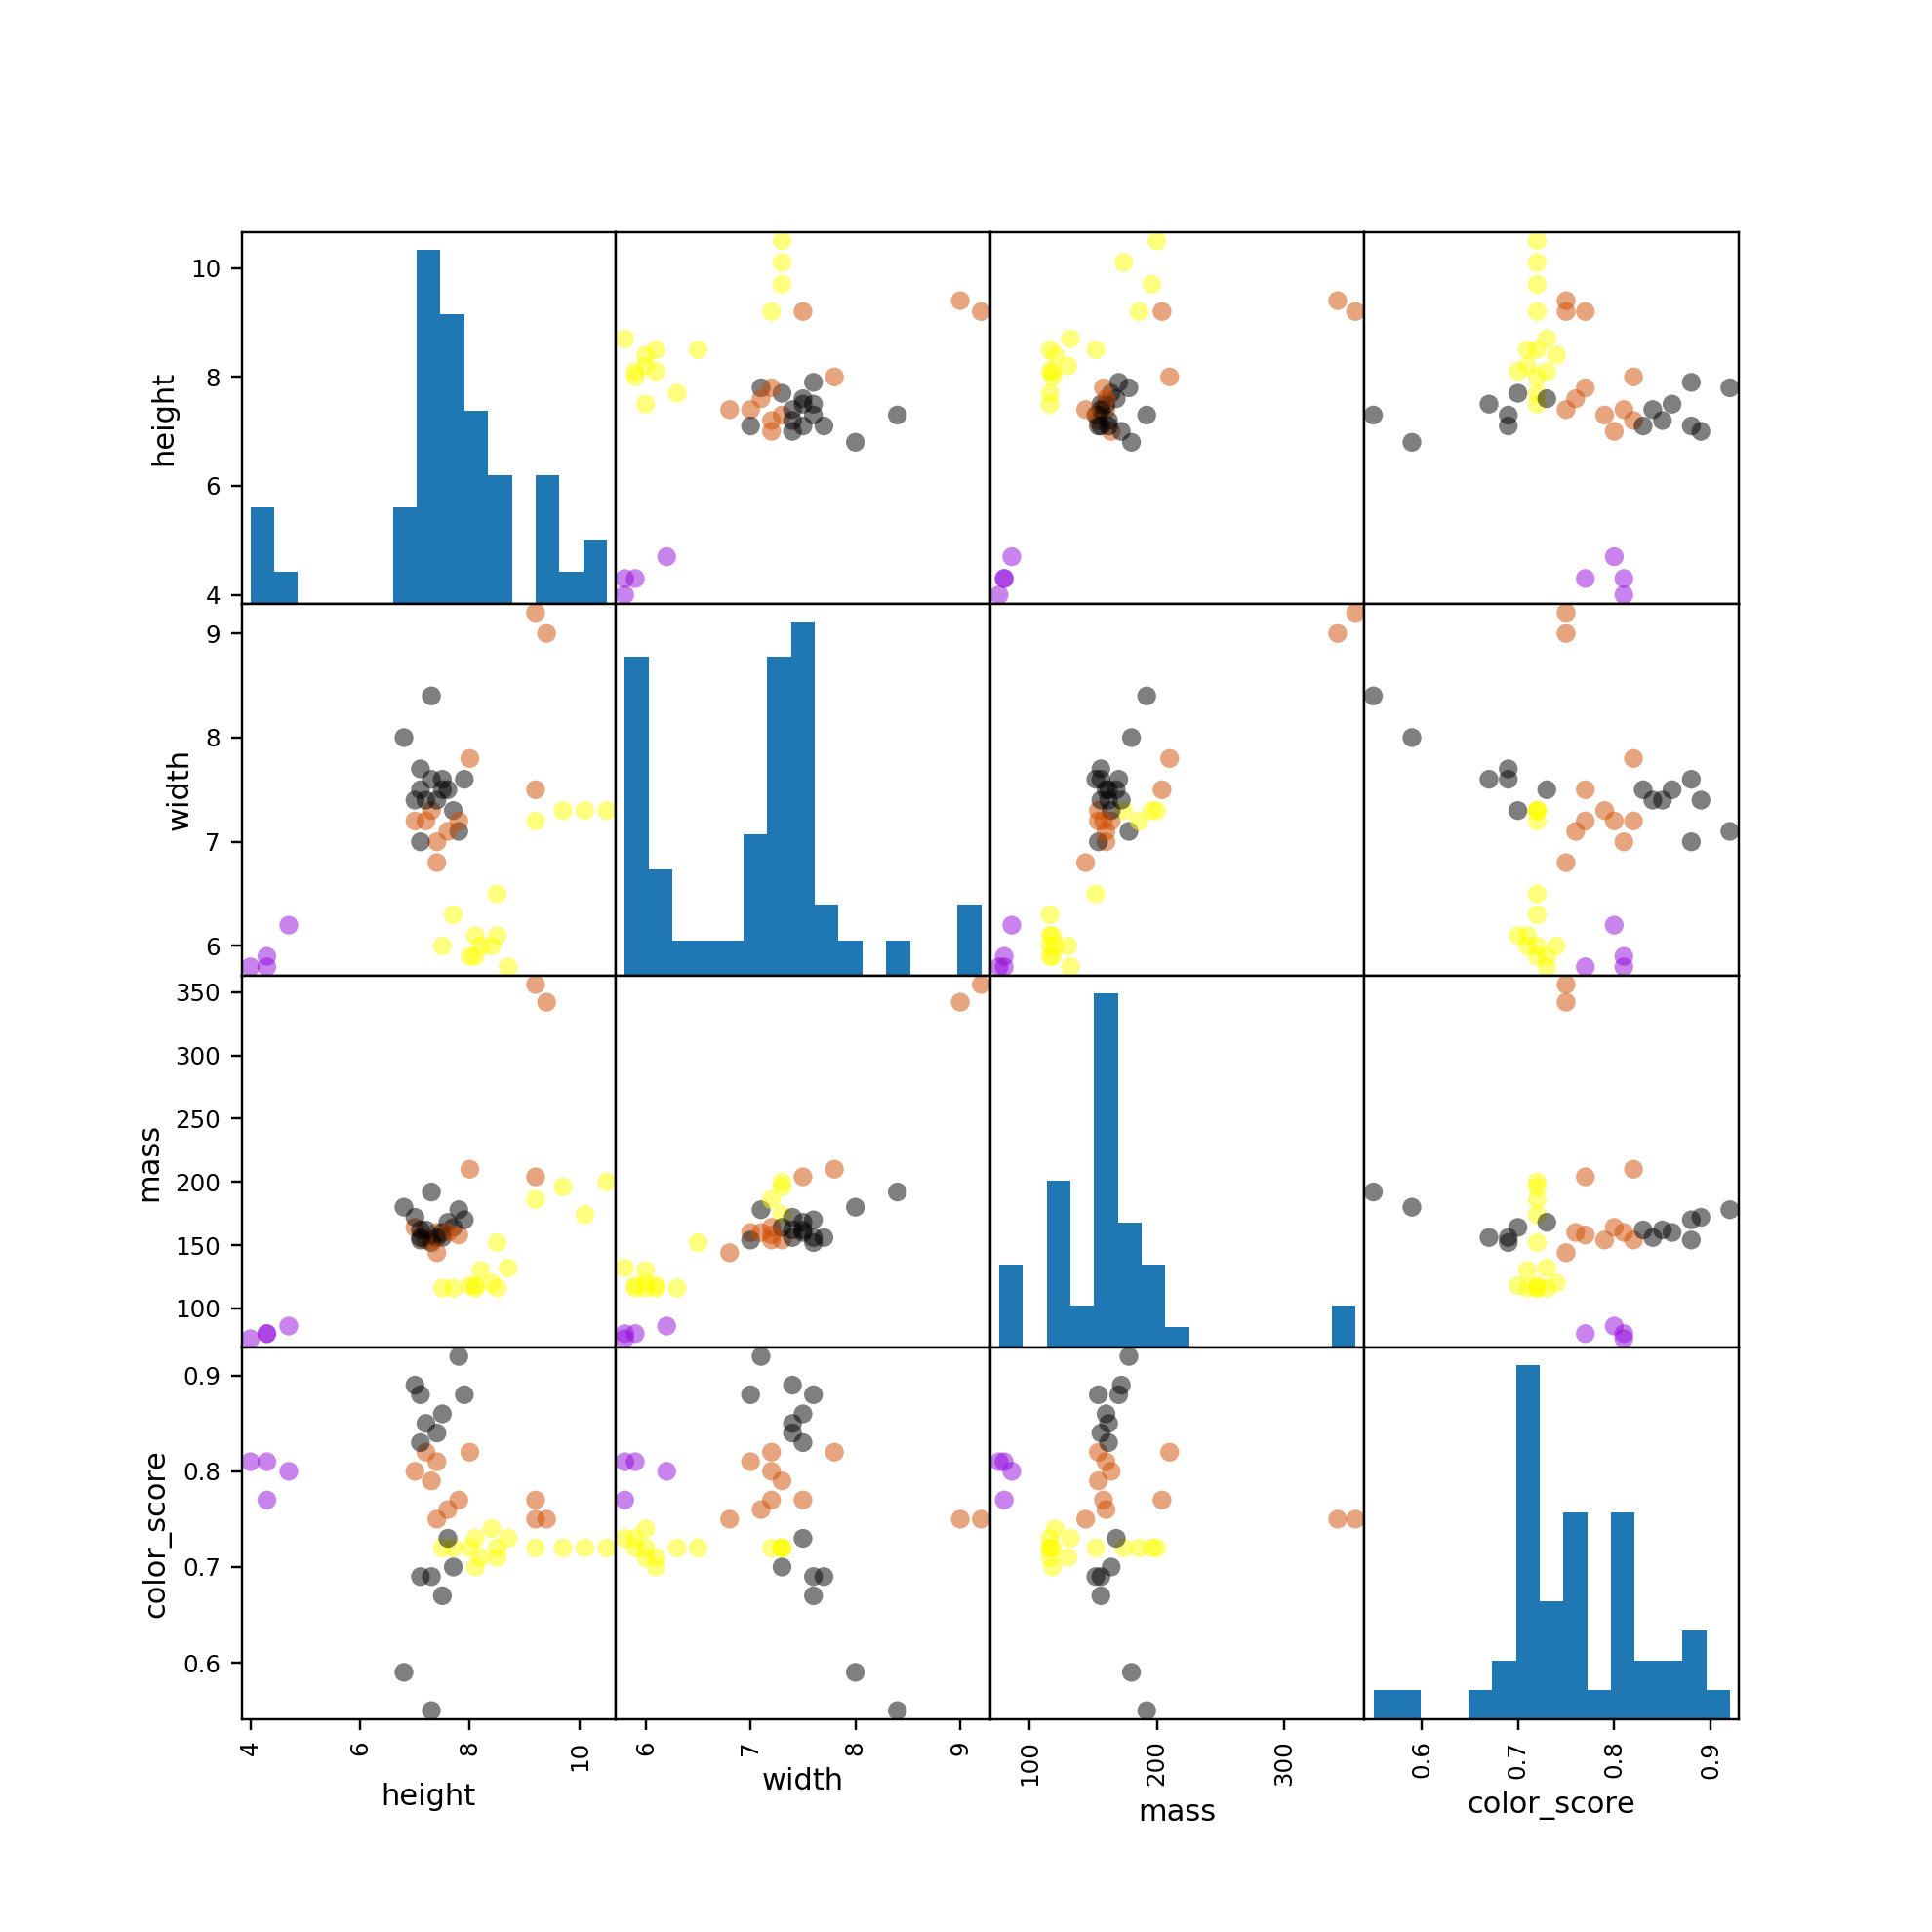

In [17]:
scatter = pd.plotting.scatter_matrix(X_train, #Our independent variables
                                     c= y_train, #Color is the group
                                     marker = 'o', #Dots
                                     s=40, #Size
                                     hist_kwds={'bins':15}, #The bin size for the diagonal histograms
                                     figsize=(9,9), #Size of the scatterplot
                                     cmap=cmap)

Plotting higher-dimensional data in 2D is great, but it's hard to interpret. So let's go up the highest dimension that we can really work with: 3D.

To do so let's use the Axes3D module.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


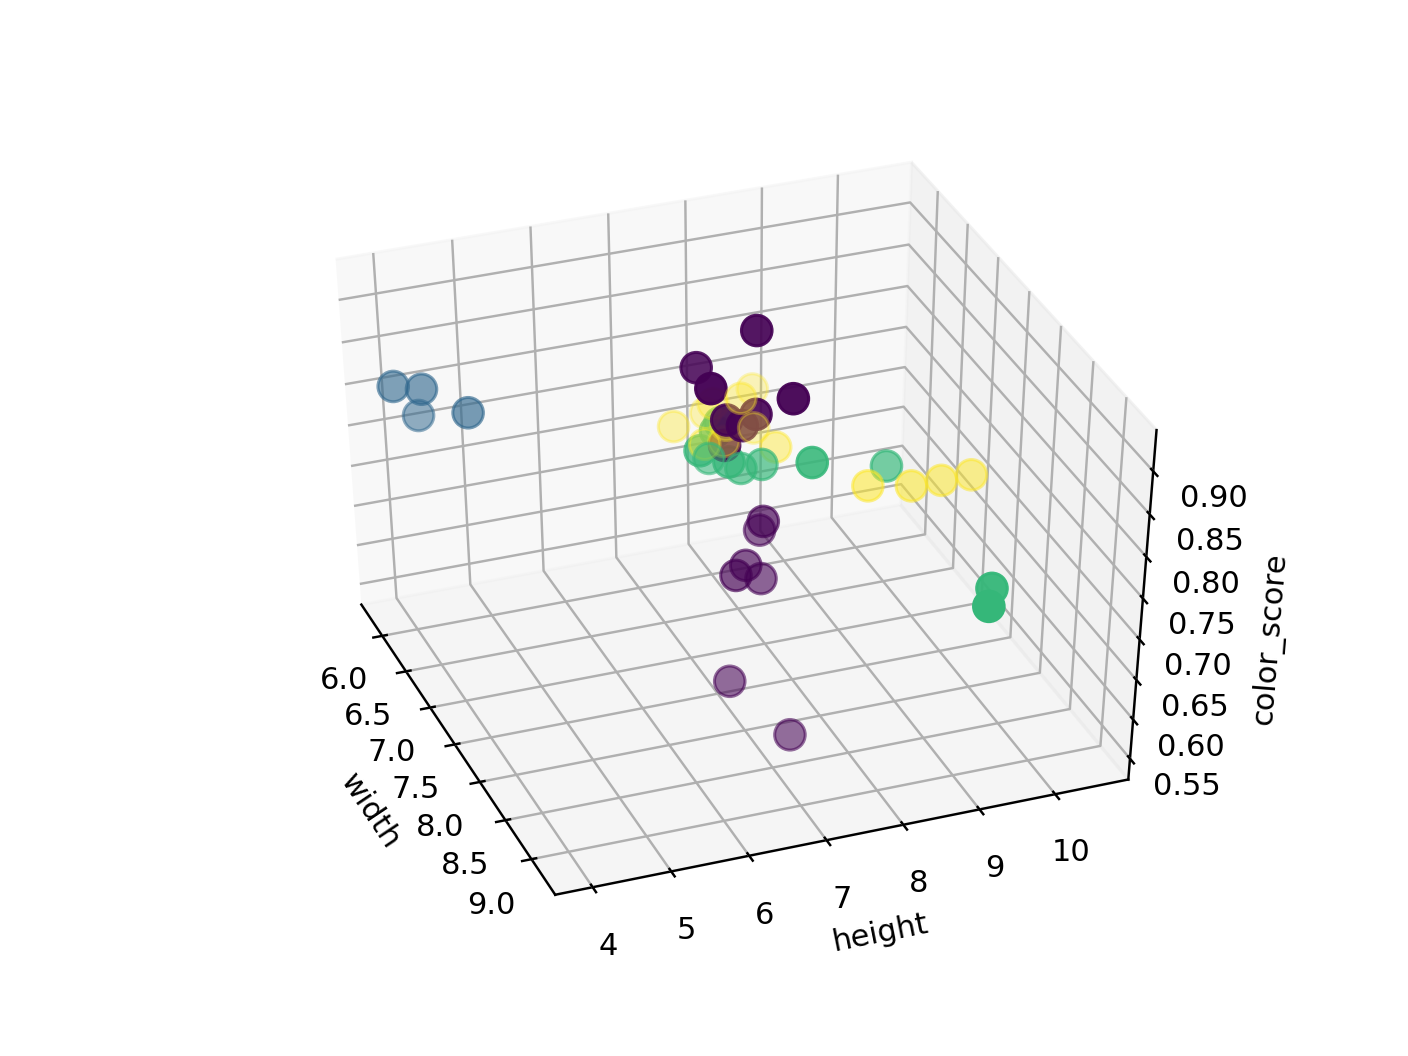

In [19]:
fig = plt.figure() #This opens the pipe to the plot, now we'll pass in parameters
ax = fig.add_subplot(111, projection = '3d') #We're going to create a 3D plot
ax.scatter(X_train['width'], #X-axis
           X_train['height'], #Y-axis
           X_train['color_score'], #Z-axis
           c = y_train, #Color is the training value
           marker = 'o', #We'll use dots, represented by the letter "o"
           s=100) #Size of the dots
ax.set_xlabel('width') #This labels the x-axis as "width"
ax.set_ylabel('height')#This labels the y-axis as "height"
ax.set_zlabel('color_score') #This labels the z-axis as "color"
plt.show() #Now plot it by closing out the plt

***
***

# K-Nearest Neighbor (KNN)

If you play around with this plot (i.e., click and drag it around), you can see that there are some groupings based on these features. 

To dig a bit deeper, let's use a classifier called the K-Nearest Neighbor (KNN) model. It is a supervised machine learning algorithim, because you are trying to classify a point based on the known classification of other points.

To begin, let's focus on the attributes of the fruit. So, instead of looking at the `color_score`, let's look at fruits' `mass`. So, let's re-split our data up into training and test data sets.

In [20]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Let's use the `scikit-learn` module, and import the K-Nearest Neighbor function that's already prepackaged. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier

Now, let's set up our KNN model. The only parameter we need to pass in is the number of clusters that we think exist in our data. Don't worry if you think this number is off, we'll discuss that in a minute. 

In [22]:
knn = KNeighborsClassifier(n_neighbors = 5)

Now, let's train the classifier (fit the estimator) using the training data

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Recall, the test data sets that we set up. Now, let's use them to estimate the accuracy of the classifier on future data. In other words, we constructed the model based on the training data. Now, let's test it and see how well it worked and predicting values. 

In [24]:
knn.score(X_test, y_test)

0.5333333333333333

This suggests that the accuracy is only 50%. In other words, really no better than chance. (We can fix this later.)

First, let's use the trained KNN classifier model to classify new, previously unseen objects.

First example: a small fruit with mass 20 grams, width 4.3 cm, height 5.5 cm

In [25]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]])

Now let's see what fruit it predicted. Recall the `Dictionary` we made earlier called `lookup_fruit_name`. 

In [26]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

Second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm

In [27]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

***
***

# Checkpoint 2 of 5

## Now you try!

### Repeat the above KNN model, but instead of using 'mass', 'width', 'height', just use 'mass' and 'height'. Be sure to create new variables:
- X_ckpt2 and Y_ckpt2
- X_train_chkpt2, X_test_ckpt2, y_train+ckpt2, y_test_ckpt2
- knn_chkpt2

### Use `K`=5 neighbors, just as before. 

### Use mass as 100g and height as 8.5 cm. What fruit does your model predict?

In [28]:
X_chkpt2 = fruits[['mass','height']]
y_chkpt2 = fruits['fruit_label']
X_train_chkpt2, X_test_chkpt2, y_train_chkpt2, y_test_chkpt2 = train_test_split(X_chkpt2, y_chkpt2, random_state=0)

In [29]:
knn_chkpt2 = KNeighborsClassifier(n_neighbors = 5)

In [30]:
knn_chkpt2.fit(X_train_chkpt2, y_train_chkpt2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
knn_chkpt2.score(X_test_chkpt2, y_test_chkpt2)

0.4666666666666667

In [33]:
fruit_prediction = knn_chkpt2.predict([[100, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

***
***

Recall, we set the model to have 5 neighborhoods. Also, recall how accurate (or inaccurate) our mdoel is. This begs the question: 
    How sensitive is k-NN classification accuracy to the choice of the `k` parameter. 
    
Let's test our model across a range of `k`s, from 1 to 20. Let's create a `for-loop` and re-run the model for values each value of `k` through 20.

In [34]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

Now, let's plot the accuracy of the models for each value of `k`.

<IPython.core.display.Javascript object>


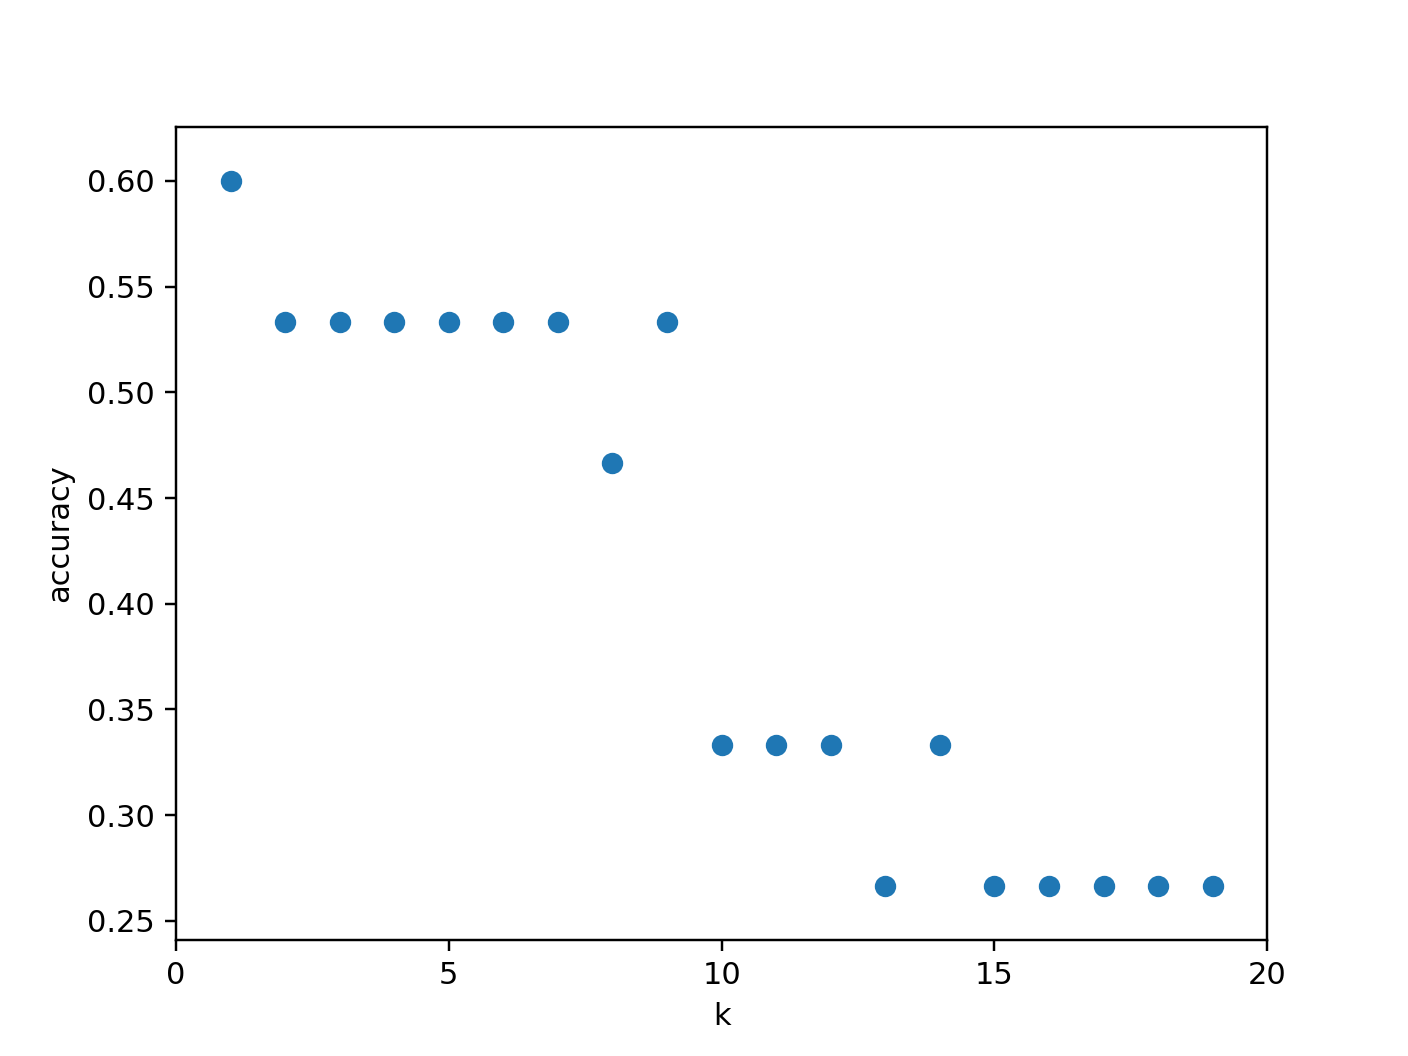

In [35]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

As you can see, the higher the value of `K` (i.e., x-axis), the less accurate the model is (y-axis). In fact, beyond `K`=9, the accuracy drops. This is when machine learning becomes more of an art than a science. The number `K` depends on what is meaningful to your research question. 

***

Now, let's see how sensitive the KNN classification accuracy is to the train/test split proportion? Recall we used a 75/25 split. 

Let's create a list `t` of different test propotions (the traing proportions is 1 minus this value), and run a `for-loop`.

In [36]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

Now, let's plot this. (Note it will take a few minutes to run.)

<IPython.core.display.Javascript object>


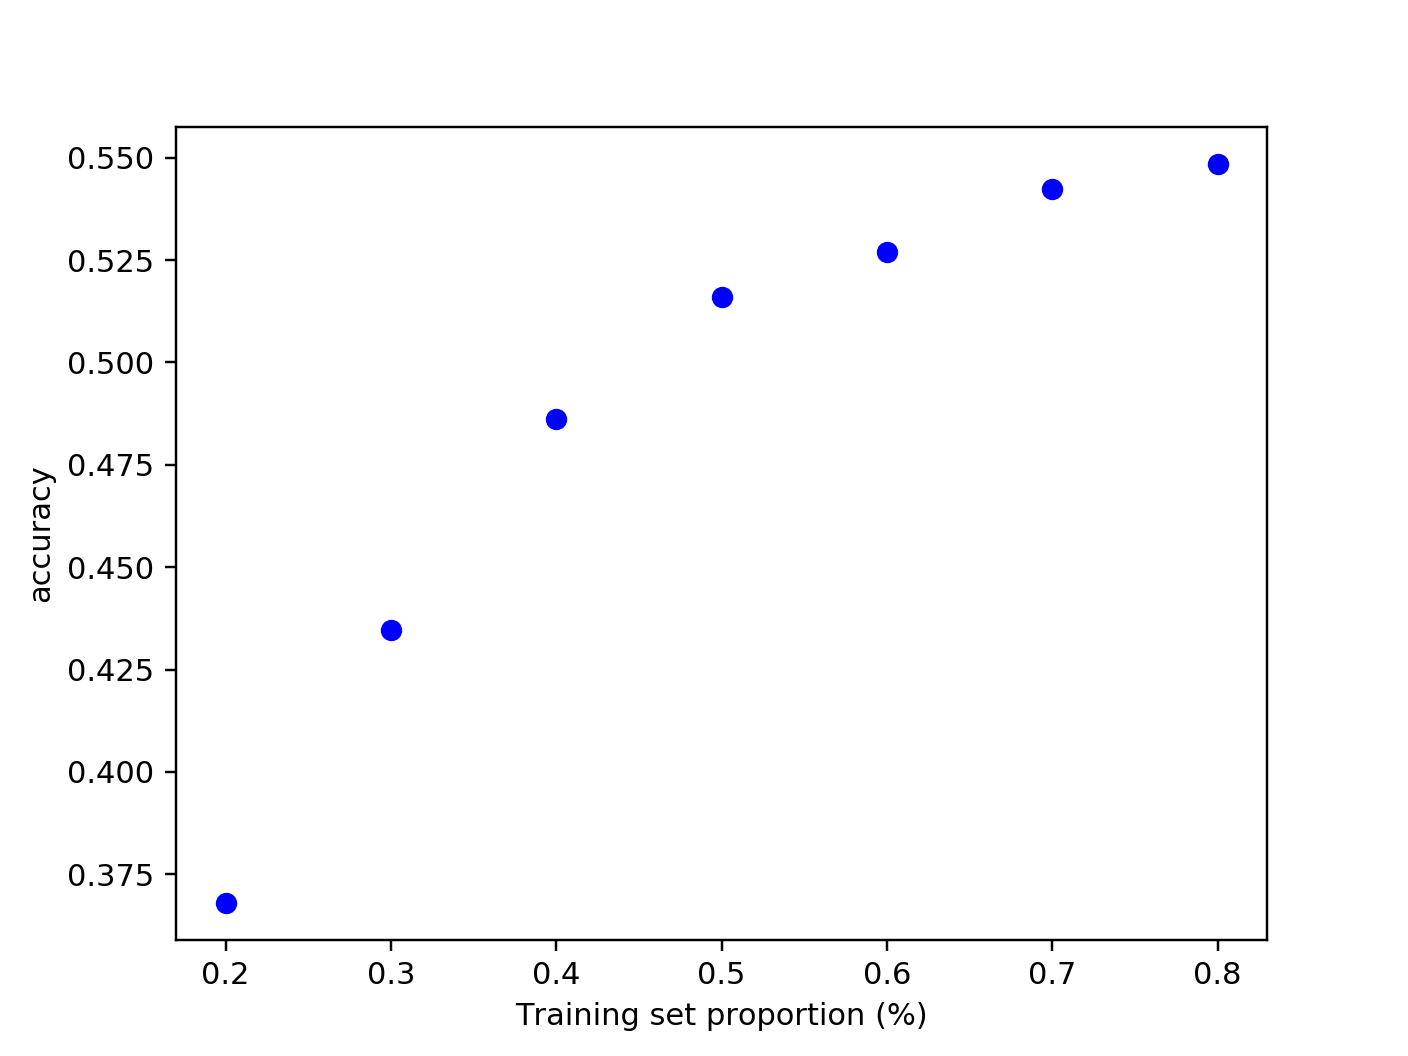

In [37]:
plt.figure()

for s in t:

    scores = [] #List for scores, but reset with each value in the list, t
    for i in range(1,1000): #Train for a 1,000 iterations 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test)) #Append scores
    plt.plot(s, np.mean(scores), 'bo') #Save the average value of these scores for this value in t

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

We can see here that the higher the proportion dedicated to 'training' the better the accuracy. 

However, as mentioned earlier, this runs the risk of overfitting the data. 

***

## Predictions and Evaluation of a Machine Learning

Now that we have a model it is time to use it to get predictions! We can do this simply with the `predict()` method off of our fitted model (Note: this may take some time).

Let's revist the fruit data we used earlier. Let's look at `X_test`. 

Note: Make sure for the checkpoints you didn't accidently use `X_test`. 

In [38]:
X_test.head()

,mass,width,height
55,116,6.3,7.7
53,120,6.0,8.4
34,142,7.6,7.8
0,192,8.4,7.3
1,180,8.0,6.8


Create the prediction values from the `knn` model we ran earlier. 

In [39]:
predictions = knn.predict(X_test)

Take a look at the `y_pred`:

In [40]:
predictions

array([4, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4])

What does this array of 1s and 3s mean? It's the  prediction of each "fruit." We used the KNN to classify fruit based on its features. 

However, we need to evaluate how good these predictions are. 

Now we can use SciKit-Learn's built in metrics such as a classification report and confusion matrix to evaluate how well our model performed. 

The simplest way might be to count the number of matches and mis-matches. But this is not always sufficient.  For example, imagine you have a situation where you'd like to identify a rare class of event from within a large number of background sources (in astronomy, an example of this is finding variable stars from the background of non-varying stars).

What does this mean?

These are ways of taking into account not just the classification results, but the results **relative to the true category**.

$$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

$$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

$$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

$$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$

The **accuracy**, **precision**, **recall**, and **f1-score** all range from 0 to 1, with 1 being optimal.
Here we've used the following definitions:

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


Here's a great way to visualize it:

![Visualizing the F1](Images/11_Precisionrecall.svg.png)

We can quickly compute a summary of these statistics using scikit-learn's provided `classification_report` and `metrics` scores:

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [42]:
print("accuracy:", metrics.accuracy_score(y_test, predictions))
print("precision:", metrics.precision_score(y_test, predictions,average='weighted'))
print("recall:", metrics.recall_score(y_test, predictions,average='weighted'))
print("f1 score:", metrics.f1_score(y_test, predictions,average='weighted'))

accuracy: 0.3958333333333333
precision: 0.2551638176638176
recall: 0.3958333333333333
f1 score: 0.27719411092052604


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.36      1.00      0.53        14
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        17
           4       0.56      0.38      0.45        13

    accuracy                           0.40        48
   macro avg       0.23      0.35      0.25        48
weighted avg       0.26      0.40      0.28        48



/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


This tells us that the overall correct classification rate is 26.7% (accuracy). 

We correctly identify 26.7% of the desired samples (recall), and those that we properly labeled to "culitvate" are 7% correct (precision)! Not great. Let's try out some other models.  

(Note: the results will vary each time you run the code because the model will be trained on a different sample.) 

****
****

# Checkpoint 3 of 5

## Now you try!

### Using a new set of data on wines from UCI, run a KNN with the values of K=3, 5, and 7. For each value of K, calculate accuracy and precision. 

### I've set up the data for you below. 

In [96]:
import pandas as pd
wine = pd.read_csv('Data/wine_data.csv', 
                   names = ["Cultivator", 
                            "Alchol", 
                            "Malic_Acid", 
                            "Ash", 
                            "Alcalinity_of_Ash", 
                            "Magnesium", 
                            "Total_phenols", 
                            "Falvanoids", 
                            "Nonflavanoid_phenols", 
                            "Proanthocyanins", 
                            "Color_intensity", 
                            "Hue", 
                            "OD280", 
                            "Proline"])

X_chkpt3 = wine.drop("Cultivator",axis=1)[["Malic_Acid","Color_intensity","Alchol"]] #Pick three features for the KNN as your X
y_chkpt3 = wine["Cultivator"] #We'll use "cultivator" as your Y. 

In [97]:
wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [98]:
X_train_chkpt3_3, X_test_chkpt3_3, y_train_chkpt3_3, y_test_chkpt3_3 = train_test_split(X_chkpt3, y_chkpt3, random_state=0)

knn_chkpt3_3 = KNeighborsClassifier(n_neighbors = 3)

knn_chkpt3_3.fit(X_train_chkpt3_3, y_train_chkpt3_3)

knn_chkpt3_3.score(X_test_chkpt3_3, y_test_chkpt3_3)

0.8666666666666667

In [99]:
X_test_chkpt3_3.head()

,Malic_Acid,Color_intensity,Alchol
54,1.67,5.85,13.74
151,2.67,10.80,12.79
63,1.13,4.45,12.37
55,1.73,6.25,13.56
123,5.80,2.60,13.05


In [100]:
predictions_chkpt3_3 = knn_chkpt3_3.predict(X_test_chkpt3_3)
predictions_chkpt3_3

array([1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 1, 1, 1,
       3, 2, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [101]:
print("accuracy:", metrics.accuracy_score(y_test_chkpt3_3, predictions_chkpt3_3))
print("precision:", metrics.precision_score(y_test_chkpt3_3, predictions_chkpt3_3,average='weighted'))
print("recall:", metrics.recall_score(y_test_chkpt3_3, predictions_chkpt3_3,average='weighted'))
print("f1 score:", metrics.f1_score(y_test_chkpt3_3, predictions_chkpt3_3,average='weighted'))

accuracy: 0.8666666666666667
precision: 0.8874074074074075
recall: 0.8666666666666667
f1 score: 0.8695409547834728


In [102]:
print(classification_report(y_test_chkpt3_3,predictions_chkpt3_3))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88        16
           2       1.00      0.81      0.89        21
           3       0.70      0.88      0.78         8

    accuracy                           0.87        45
   macro avg       0.84      0.87      0.85        45
weighted avg       0.89      0.87      0.87        45



In [103]:
X_train_chkpt3_5, X_test_chkpt3_5, y_train_chkpt3_5, y_test_chkpt3_5 = train_test_split(X_chkpt3, y_chkpt3, random_state=0)

knn_chkpt3_5 = KNeighborsClassifier(n_neighbors = 5)

knn_chkpt3_5.fit(X_train_chkpt3_5, y_train_chkpt3_5)

knn_chkpt3_5.score(X_test_chkpt3_5, y_test_chkpt3_5)

0.8444444444444444

In [104]:
X_test_chkpt3_5.head()

,Malic_Acid,Color_intensity,Alchol
54,1.67,5.85,13.74
151,2.67,10.80,12.79
63,1.13,4.45,12.37
55,1.73,6.25,13.56
123,5.80,2.60,13.05


In [105]:
predictions_chkpt3_5 = knn_chkpt3_5.predict(X_test_chkpt3_5)
predictions_chkpt3_5

array([1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1,
       3, 2, 2, 2, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [106]:
print("accuracy:", metrics.accuracy_score(y_test_chkpt3_5, predictions_chkpt3_5))
print("precision:", metrics.precision_score(y_test_chkpt3_5, predictions_chkpt3_5,average='weighted'))
print("recall:", metrics.recall_score(y_test_chkpt3_5, predictions_chkpt3_5,average='weighted'))
print("f1 score:", metrics.f1_score(y_test_chkpt3_5, predictions_chkpt3_5,average='weighted'))

accuracy: 0.8444444444444444
precision: 0.8666666666666667
recall: 0.8444444444444444
f1 score: 0.8471734892787525


In [107]:
print(classification_report(y_test_chkpt3_5,predictions_chkpt3_5))

              precision    recall  f1-score   support

           1       0.75      0.94      0.83        16
           2       1.00      0.81      0.89        21
           3       0.75      0.75      0.75         8

    accuracy                           0.84        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.87      0.84      0.85        45



In [108]:
X_train_chkpt3_7, X_test_chkpt3_7, y_train_chkpt3_7, y_test_chkpt3_7 = train_test_split(X_chkpt3, y_chkpt3, random_state=0)

knn_chkpt3_7 = KNeighborsClassifier(n_neighbors = 7)

knn_chkpt3_7.fit(X_train_chkpt3_7, y_train_chkpt3_7)

knn_chkpt3_7.score(X_test_chkpt3_7, y_test_chkpt3_7)

0.8888888888888888

In [109]:
X_test_chkpt3_7.head()

,Malic_Acid,Color_intensity,Alchol
54,1.67,5.85,13.74
151,2.67,10.80,12.79
63,1.13,4.45,12.37
55,1.73,6.25,13.56
123,5.80,2.60,13.05


In [110]:
predictions_chkpt3_7 = knn_chkpt3_7.predict(X_test_chkpt3_7)
predictions_chkpt3_7

array([1, 3, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2])

In [111]:
print("accuracy:", metrics.accuracy_score(y_test_chkpt3_7, predictions_chkpt3_7))
print("precision:", metrics.precision_score(y_test_chkpt3_7, predictions_chkpt3_7,average='weighted'))
print("recall:", metrics.recall_score(y_test_chkpt3_7, predictions_chkpt3_7,average='weighted'))
print("f1 score:", metrics.f1_score(y_test_chkpt3_7, predictions_chkpt3_7,average='weighted'))

accuracy: 0.8888888888888888
precision: 0.9034920634920633
recall: 0.8888888888888888
f1 score: 0.8890408357075024


In [60]:
print(classification_report(y_test_chkpt3_7,predictions_chkpt3_7))

              precision    recall  f1-score   support

           1       0.64      0.88      0.74        16
           2       0.93      0.67      0.78        21
           3       0.88      0.88      0.88         8

    accuracy                           0.78        45
   macro avg       0.81      0.81      0.80        45
weighted avg       0.82      0.78      0.78        45



***
***

***
***

## Support Vector Machines


There are many machine learning algorithms available; here we'll go into brief detail on one of the most common and interesting ones: **Support Vector Machines (SVMs)**.

As before, we'll start by getting our notebook ready for interactive plotting:

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

Let's show a quick example of support vector classification. First we need to create a dataset:

<IPython.core.display.Javascript object>


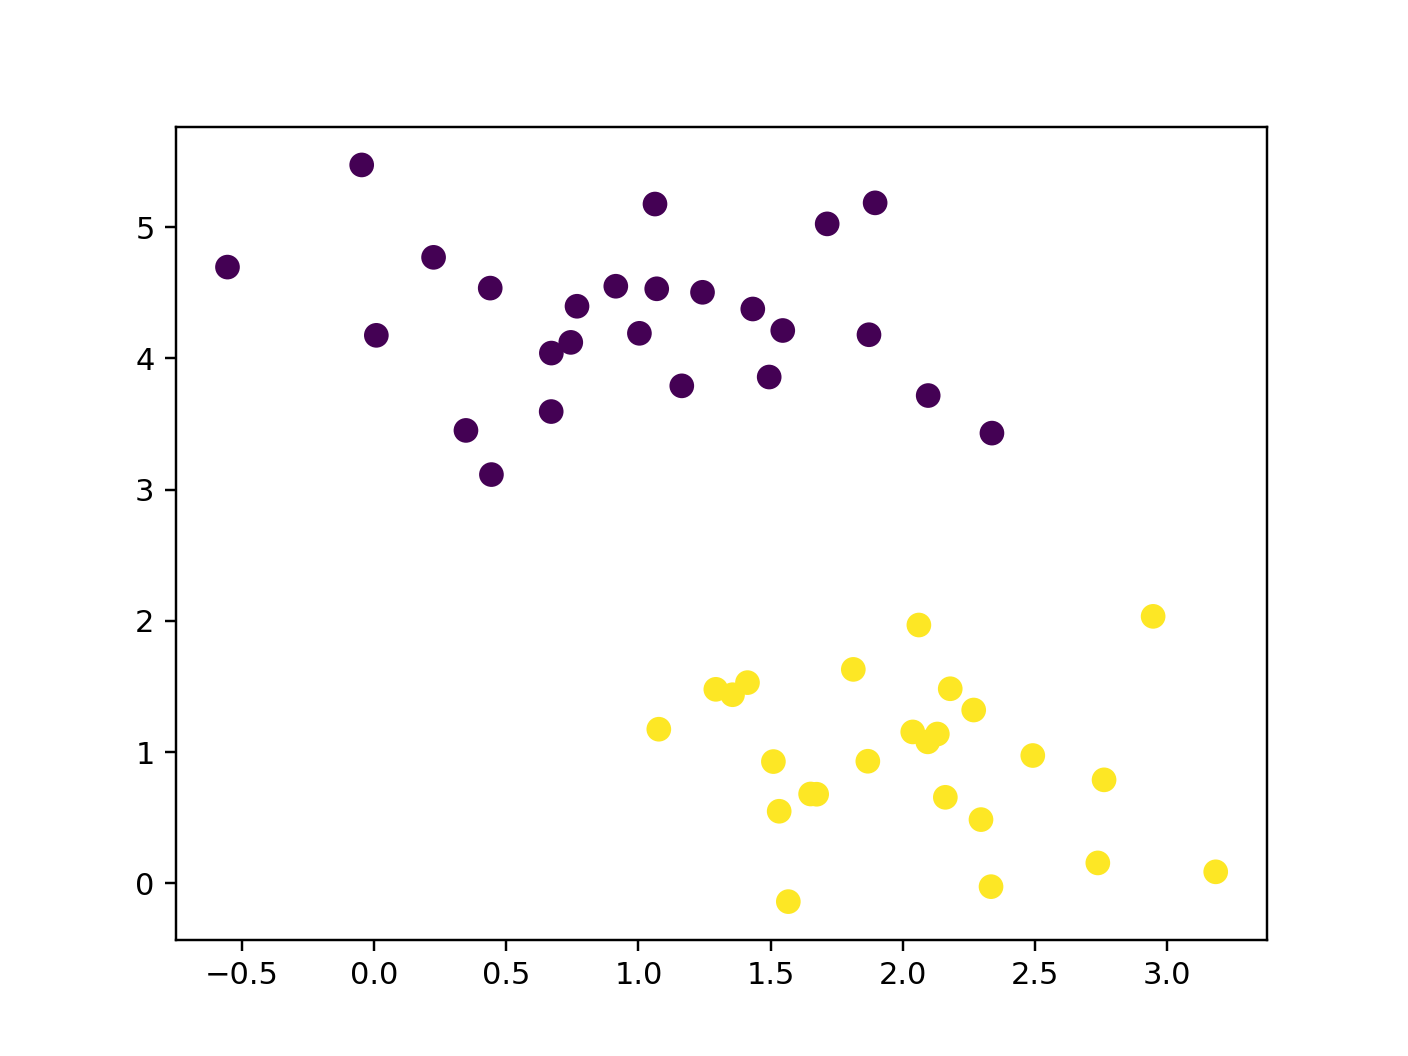

In [61]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

Now we'll fit a Support Vector Machine (SVM) classifier to these points:

In [62]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [63]:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    return plt.contour(X, Y, P, 
                       colors='k',
                       levels=[-1, 0, 1],
                       linestyles=['--', '-', '--'])

<IPython.core.display.Javascript object>


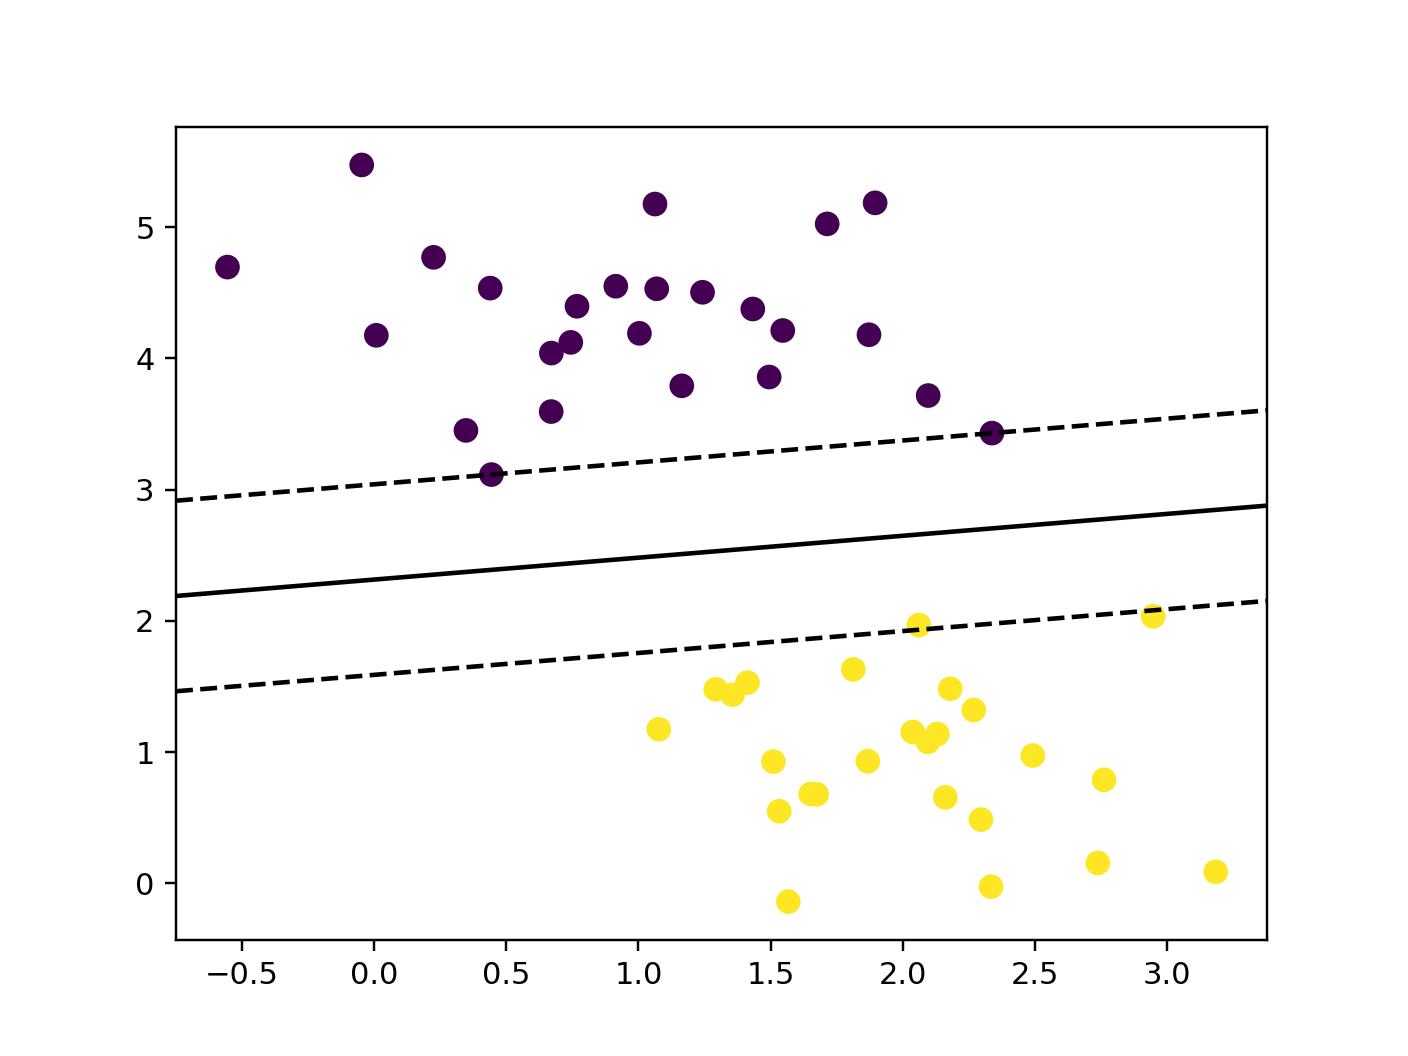

In [64]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf);

Notice that the dashed lines touch a couple of the points: these points are known as the "support vectors," and are stored in the ``support_vectors_`` attribute of the classifier:

<IPython.core.display.Javascript object>


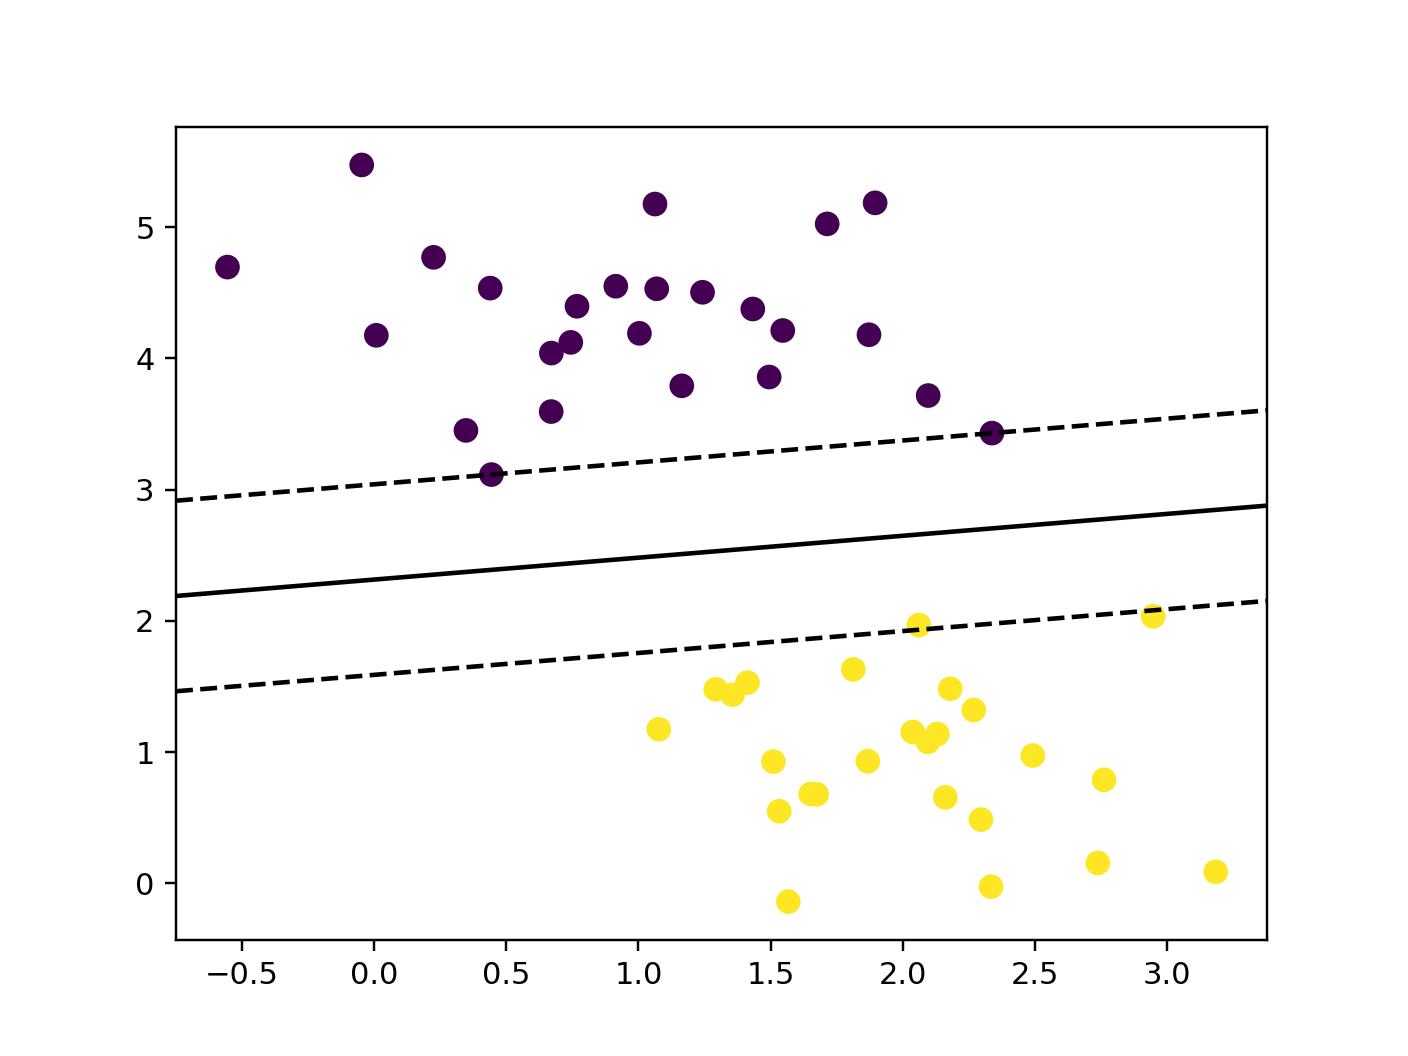

In [65]:
plt.figure()

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], 
            clf.support_vectors_[:, 1],
            s=200, facecolors='none');

The unique thing about SVM is that only the support vectors matter: that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

The properties of SVMs make them extremely useful classifiers in practice.

Now, let's take a look at another powerful classifier.

***
***

# Bringing It All Together

So, let's bring everything we've done in this unit together. We can evaluate the performance of our supervised models in the same way we did for the KNN. 

We'll use Support Vector Machine (SVM), which, if you recall from last time, tries to map data points in a way that maximizes the spatial gap between the clusters. In two dimensions, this just means drawing a line (or curves) to divide the data points. (Or in three dimensions it means drawing a plane to do the same task. And so on.)

First, let's import some modules that we'll be using. (We already did this earlier, but I want to include all of the code you'll need to run a proper model from start to finish in one place.)

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Let's first read in the data. Let's use the wine fraud data from UC, Irvine. 

In [67]:
import pandas as pd
wine = pd.read_csv('Data/wine_data.csv', 
                   names = ["Cultivator", 
                            "Alchol", 
                            "Malic_Acid", 
                            "Ash", 
                            "Alcalinity_of_Ash", 
                            "Magnesium", 
                            "Total_phenols", 
                            "Falvanoids", 
                            "Nonflavanoid_phenols", 
                            "Proanthocyanins", 
                            "Color_intensity", 
                            "Hue", 
                            "OD280", 
                            "Proline"])

In [68]:
X = wine.drop("Cultivator",axis=1) #Let's use all of these features in the SVM as our X

In [69]:
y = wine["Cultivator"] #We'll again use "cultivator" as our Y. 

Let's import the modules we'll be needing.

In [71]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

Recall our previous discussion of the importance of splitting data into a *training set* and a *testing set*: we'll be extending that here. 

Now, let's estimate an SVM model, by first splitting our data into a training and test set. 

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #Split the data
clf = SVC().fit(X_train, y_train) #Fit the training data to the model
y_pred = clf.predict(X_test) #Now use the test-data (X_Test) to see how well it does 

/usr/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The problem here is that we might not care how well we can classify the **background**, but might instead be concerned with successfully pulling-out an uncontaminated set of **foreground** sources.  We can get at this by computing statistics such as the **precision**, the **recall**, and the **f1 score**.


In [73]:
print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred,average='weighted'))
print("recall:", metrics.recall_score(y_test, y_pred,average='weighted'))
print("f1 score:", metrics.f1_score(y_test, y_pred,average='weighted'))

accuracy: 0.5111111111111111
precision: 0.7612403100775194
recall: 0.5111111111111111
f1 score: 0.3875862381989833


Since "cultivate" has three categories, we can see each of these metrics across its three values:

In [74]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.06      0.12        16
           2       0.49      1.00      0.66        21
           3       1.00      0.12      0.22         8

    accuracy                           0.51        45
   macro avg       0.83      0.40      0.33        45
weighted avg       0.76      0.51      0.39        45



This tells us that the overall correct classification rate is 51% (accuracy). 

While we only correctly identify 51% of the desired samples (recall), those that we properly labled to "culitvate"are 76% correct (precision)!  

This is why you should make sure to carefully choose your metric when validating a model.

***
***

# Checkpoint 4 of 5

## Now you try!

### Just like with checkpoint 3, re-create an SVM, but use the fruit dataset. 
### Calculate the accuracy and precision for the SVM. 

In [75]:
fruits_chkpt4 = pd.read_csv('Data/fruit_data_with_colors.txt',sep="\t")
fruits_chkpt4.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [76]:
X_chkpt4 = fruits[['height', 'width', 'mass', 'color_score']]
y_chkpt4 = fruits['fruit_label']

In [77]:
X_train_chkpt4, X_test_chkpt4, y_train_chkpt4, y_test_chkpt4 = train_test_split(X_chkpt4, y_chkpt4, random_state=0) #Split the data
clf_chkpt4 = SVC().fit(X_train_chkpt4, y_train_chkpt4) #Fit the training data to the model
y_pred_chkpt4 = clf_chkpt4.predict(X_test_chkpt4) #Now use the test-data (X_Test) to see how well it does 

/usr/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
print("accuracy:", metrics.accuracy_score(y_test_chkpt4, y_pred_chkpt4))
print("precision:", metrics.precision_score(y_test_chkpt4, y_pred_chkpt4,average='weighted'))
print("recall:", metrics.recall_score(y_test_chkpt4, y_pred_chkpt4,average='weighted'))
print("f1 score:", metrics.f1_score(y_test_chkpt4, y_pred_chkpt4,average='weighted'))

accuracy: 0.4666666666666667
precision: 0.7555555555555556
recall: 0.4666666666666667
f1 score: 0.43555555555555553


/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
print(metrics.classification_report(y_test_chkpt4, y_pred_chkpt4))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         4
           2       0.00      0.00      0.00         1
           3       1.00      0.25      0.40         8
           4       1.00      0.50      0.67         2

    accuracy                           0.47        15
   macro avg       0.58      0.44      0.39        15
weighted avg       0.76      0.47      0.44        15



/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# The overall correct classification rate is 47% (accuracy).
# While we only correctly identify 47% of the desired samples (recall), those that we properly labled are 76% correct 

***
***

## GridSearch and Cross-Folds

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments in as parameters, like `K` in the KNN. 

Some models allow for specialized, efficient parameter search strategies. In other words, it'll find the best hyperparameter value for you! One function offered is called GridSearchCV, which exhaustively considers all parameter combinations. 

The grid search provided by `GridSearchCV` exhaustively generates potential values from a "grid" of parameter values (hence, `GridSearch`) specified with the param_grid parameter.

First, let's import it. 

In [80]:
from sklearn.model_selection import GridSearchCV

Let's consider the `KNN` model from before. Here, you would use values to find the optimal number of n_neighbors. Let's look at values between 1 and 10. 

In [81]:
param_grid = {'n_neighbors': np.arange(1, 10)} 

Now, let's use `GridSearchCV` with the `KNN` model and find the optimal hyperparameters. 


The `Number_of_CrossFold_Validation` is the numbe of "cross folds" on the training data (e.g., 5, 10, 15, etc.). This is an important concept. 



## K-Folds Cross-Validation

One of the first things you learn about in applying machine learning is the importance of cross-validation: evaluating the performance of your model on a portion of your dataset separate from what you used to train your model. The easiest way is to holdout a test set and compare performance using that. For instance, recall that when we split our data into testing and training sets, we did so using a 30%/70% split: train your model on 70% of your labeled data evaluate the trained model on the remaining 30%. 

K-fold cross-validation improves on this by letting you do this multiple times so you can see whether the test performance varies based on which samples you used to train and test. For instance, had we just used the 30% testing, our results may have been dependent (by chance) on whatever quirks were in that 30% hold out. If we use cross-validation and train our model on multiple training sets, we improve our model! 

This is what we refer to as the "folds" in our data, or the number of ways with which we split our data: It splits dataset into k consecutive folds.

The example below shows a training set, with 10 folds: 9 are used for trainin and 1 is used for testing. 

![Machine learning](Images/10-k-fold-diagram.png)

We can do this using `GridSearchCV`! Let's give it a try with a KNN. 

Recall the parameter grid we set for `K`. Now, let's also select the number of cross folds. Let's try 10. This will mirror the procedure we see above. 

In [82]:
my_model_grid_search = GridSearchCV(knn, # Your Model 
                                    param_grid, # Your Parameters
                                    cv=10) # Number of Crossfolds

Now fit your data to the `GridSearch` you set up. 

In [83]:
my_model_grid_search.fit(X, y)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Let's see what value worked best!

In [85]:
my_model_grid_search.cv_results_

{'mean_fit_time': array([0.00363688, 0.00365615, 0.00360022, 0.0027956 , 0.00202091,
        0.0020144 , 0.00206931, 0.00206769, 0.0020103 ]),
 'std_fit_time': array([3.50206603e-04, 1.20180040e-04, 1.66839155e-04, 6.00112277e-04,
        9.40255924e-05, 1.10460540e-04, 1.76865647e-04, 1.79513999e-04,
        7.50509574e-05]),
 'mean_score_time': array([0.00355577, 0.00354145, 0.00349467, 0.00266128, 0.00197704,
        0.0020241 , 0.00204861, 0.00207982, 0.00201216]),
 'std_score_time': array([5.46501848e-04, 1.34290773e-04, 1.27003769e-04, 5.37121224e-04,
        8.94590893e-05, 7.15917480e-05, 1.56796038e-04, 1.17099022e-04,
        7.08510221e-05]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors

***
***

# Checkpoint 5 of 5

## Now you try!

### Repeat the steps that we just walked through for the `KNN`, but now it with a CV of 5 and values from 1 to 5. How do your results change?

In [86]:
param_grid = {'n_neighbors': np.arange(1, 5)} 

In [87]:
my_model_grid_search = GridSearchCV(knn, # Your Model 
                                    param_grid, # Your Parameters
                                    cv=5) # Number of Crossfolds

In [88]:
my_model_grid_search.fit(X, y)

/usr/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [91]:
my_model_grid_search.cv_results_

{'mean_fit_time': array([0.00408869, 0.00338326, 0.00339966, 0.00365434]),
 'std_fit_time': array([9.34106582e-04, 7.29165874e-05, 4.21210535e-05, 8.73802759e-05]),
 'mean_score_time': array([0.00453053, 0.00418816, 0.00424337, 0.00455832]),
 'std_score_time': array([7.81601961e-04, 9.29088295e-05, 1.05048103e-04, 5.67185583e-04]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4}],
 'split0_test_score': array([0.78378378, 0.59459459, 0.62162162, 0.62162162]),
 'split1_test_score': array([0.66666667, 0.63888889, 0.72222222, 0.72222222]),
 'split2_test_score': array([0.66666667, 0.63888889, 0.66666667, 0.63888889]),
 'split3_test_score': array([0.68571429, 0.65714286, 0.65714286, 0.65714286]),
 'split4_test_score': array([0.82352941, 0.79411765, 0.85294118, 0.76470588]),
 'mean_test_score

***
***